#### Cohort Analysis
##### Date: 2025-12-29

**Topics:**
> 1. Cohort Analysis 
> 2. Pivot table 
> 3. Metrics 
> 4. Heatmap 

**Materials:**
> 1. [Step by step](https://www.adasight.com/blog/cohort-analysis-definition-key-steps-examples)
> 2. [Cohort Analysis example](https://hex.tech/templates/reporting/cohort-analysis/)

#### Когорта 
Це група користувачів, об’єднаних спільною подією у певний період часу

**Когорта** — це множина користувачів, які:
> мали однакову стартову подію \
> у чітко визначений період часу


**Приклади когорт:**
> користувачі, які зареєструвались у <month> \
> користувачі, які зробили першу покупку \
> користувачі, які пройшли онбординг \
> користувачі, які прийшли з Facebook

Основна проблема метрик, не зрозуміло в порівнянням з цим стало краще/гірше. 

**Що дає когортний аналіз:**
> де саме користувачі йдуть \
> у яких когортах стало краще \
> як змінюється поведінка з часом


**Типові випадки використання:**
> чи покращується продукт з часом? \
> які користувачі продовжують користуватись? \
> чи спрацювали зміни в продукті? \
> де основний відтік? \
> чи є проблеми з онбордингом?

| Cohort  | М0   | М1  | М2  | М3  |
| ------- | ---- | --- | --- | --- |
| 2024-01 | 100% | 32% | 21% | 15% |
| 2024-02 | 100% | 40% | 29% | 22% |
| 2024-03 | 100% | 48% | —   | —   |


#### Часові когорти (Time-based cohorts)
Користувачі групуються за моментом стартової події:
> реєстрація \
> перша покупка \
> перша активність

Когорта = місяць реєстрації
| Cohort  | M0   | M1  | M2  |
| ------- | ---- | --- | --- |
| 2024-01 | 100% | 30% | 18% |
| 2024-02 | 100% | 38% | 25% |
---
#### Поведінкові когорти (Behavioral cohorts)
Когорта формується за дією або набором дій, які зробив користувач.

**Приклади:**
> подивився ≥3 товарів \
> зробив покупку \
> завершив онбординг \
> додав карту
---
#### Когорти за джерелом (Acquisition cohorts)
Користувачі групуються за каналом залучення.

| Channel  | M1 retention |
| -------- | ------------ |
| Facebook | 22%          |
| Google   | 35%          |
| Referral | 58%          |
---
#### Когорти за продуктом / тарифом

**Групування за:**
> тарифом \
> планом \
> типом продукту

| Plan    | M3 retention |
| ------- | ------------ |
| Free    | 12%          |
| Premium | 48%          |

---
#### Географічні когорти

**Користувачі групуються за:**
> країною \
> регіоном \
> містом

| Country | M1 retention |
| ------- | ------------ |
| UA      | 40%          |
| KZ      | 28%          |
| PL      | 18%          |

---
#### Когорти за пристроєм / платформою

**Групування за:**
> iOS / Android / Web \
> Smart TV \
> Console

| Platform | M1 retention |
| -------- | ------------ |
| iOS      | 45%          |
| Android  | 38%          |
| Smart TV | 62%          |

---
#### Комбіновані (multi-dimensional) когорти

Когорта = (місяць реєстрації + канал + тариф)


Когортний аналіз завжди закінчується таблицею виду:
> рядки -> когорти \
> колонки -> час з моменту старту (offset) \
> значення -> метрика (users, retention, revenue)

pivot_table - зведена таблиця
```python
pd.pivot_table(
    data,
    index=...,
    columns=...,
    values=...,
    aggfunc=...
)
```
| Елемент   | У когортному аналізі          |
| --------- | ----------------------------- |
| `index`   | cohort (місяць реєстрації)    |
| `columns` | offset (місяць/тиждень життя) |
| `values`  | user_id / revenue             |
| `aggfunc` | nunique / sum                 |



In [1]:
import pandas as pd

df = pd.DataFrame({
    "user_id": [1,1,2,3,3,4],
    "signup_month": ["2024-01","2024-01","2024-01","2024-02","2024-02","2024-02"],
    "active_month": ["2024-01","2024-02","2024-01","2024-02","2024-03","2024-02"]
})

df


,user_id,signup_month,active_month
0,1,2024-01,2024-01
1,1,2024-01,2024-02
2,2,2024-01,2024-01
3,3,2024-02,2024-02
4,3,2024-02,2024-03
5,4,2024-02,2024-02


In [ ]:
# Step 1. Підготувати данні 
df["signup_month"] = pd.to_datetime(df["signup_month"])
df["active_month"] = pd.to_datetime(df["active_month"])


In [4]:
# Step 2. Порахувати offset 
df["cohort_index"] = (
    (df["active_month"].dt.year - df["signup_month"].dt.year) * 12 +
    (df["active_month"].dt.month - df["signup_month"].dt.month)
)

df

,user_id,signup_month,active_month,cohort_index
0,1,2024-01-01,2024-01-01,0
1,1,2024-01-01,2024-02-01,1
2,2,2024-01-01,2024-01-01,0
3,3,2024-02-01,2024-02-01,0
4,3,2024-02-01,2024-03-01,1
5,4,2024-02-01,2024-02-01,0


In [ ]:
# Step 3. Будуємо Pivot_table 
cohort_counts = pd.pivot_table(
    df,
    index="signup_month",
    columns="cohort_index",
    values="user_id",
    aggfunc="nunique"
)
cohort_counts

cohort_index,0,1
signup_month,,
2024-01-01,2,1
2024-02-01,2,1


In [8]:
# Step 4. Retention або інша метрика
cohort_sizes = cohort_counts.iloc[:, 0]

retention = cohort_counts.divide(cohort_sizes, axis=0)

retention = retention.round(3) * 100
retention


cohort_index,0,1
signup_month,,
2024-01-01,100.0,50.0
2024-02-01,100.0,50.0


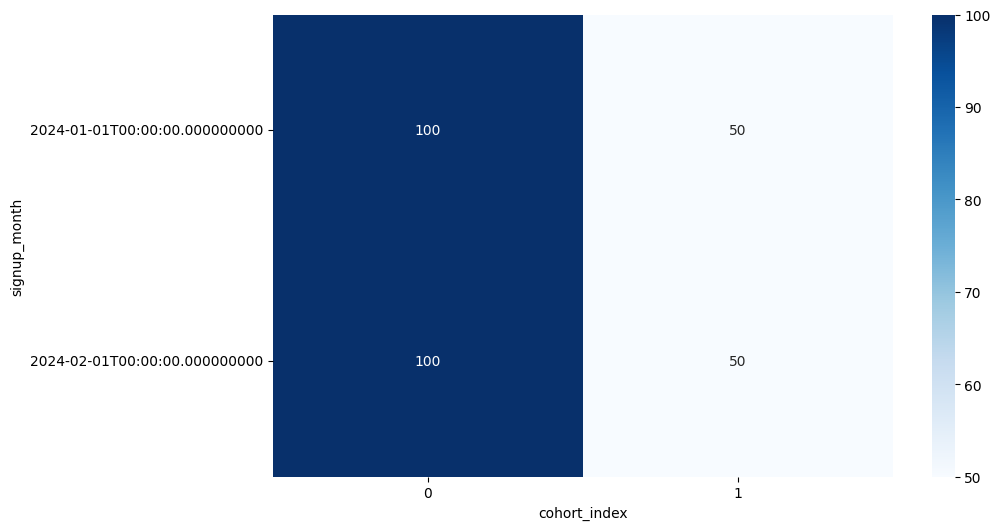

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.heatmap(
    retention,
    annot=True,
    fmt=".0f",
    cmap="Blues"
)
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [4]:
# Приклад
df = pd.read_excel('Online Retail.xlsx') # !! треба змінити на свій шлях !!

In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [23]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [34]:
df[df['Quantity'] < 0].shape

(10624, 8)

In [35]:
df[df['UnitPrice'] < 0].shape

(2, 8)

In [24]:
df['CustomerID'].nunique()

4372

In [36]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [26]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Data cleaning
df.drop_duplicates(inplace=True)
# Видаляє дублікати рядків у DataFrame.
# inplace=True означає, що зміни застосовуються безпосередньо до df, без створення нової копії

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['CustomerID'].notnull())]
# Фільтрує дані, залишаючи лише ті рядки, де Quantity та UnitPrice більші за 0, а CustomerID не є порожнім (null).

In [9]:
# Cohort Analysis
def get_month(x): return dt.datetime(x.year, x.month, 1)
# Функція для отримання першого дня місяця з дати
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
# Створює новий стовпець 'InvoiceMonth', який містить перший день місяця для кожної дати в 'InvoiceDate'
grouping = df.groupby('CustomerID')['InvoiceMonth']
# Групує дані за 'CustomerID' та отримує 'InvoiceMonth' для кожного клієнта
df['CohortMonth'] = grouping.transform('min')
#  Створює новий стовпець 'CohortMonth', який містить перший місяць (кохорт) для кожного клієнта

In [10]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Функція для отримання року, місяця та дня з дати у вказаному стовпці DataFrame

In [ ]:
invoice_year, invoice_month, invoice_day = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(df, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1
# Створює новий стовпець 'CohortIndex', який вказує на номер місяця когорти для кожного запису

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [13]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')

In [14]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cohort_sizes = cohort_counts.iloc[:,0]
# Розмір кожної когорти (кількість унікальних клієнтів у першому місяці когорти)
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Створює новий DataFrame 'retention', де кожне значення є відношенням кількості унікальних клієнтів у відповідному місяці когорти до розміру когорти
retention.index=retention.index.date
# Форматує індекс 'retention' для відображення лише дати без часу

In [16]:
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02-01,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03-01,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04-01,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,1.0,0.234114,0.301003,0.113712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


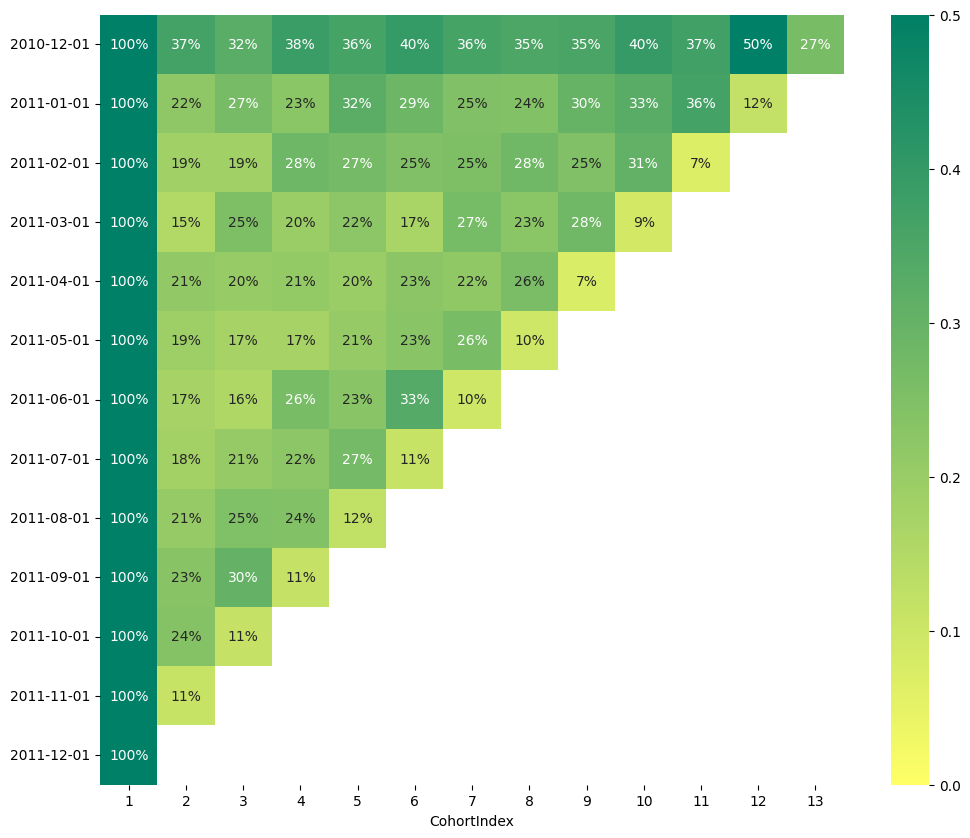

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r');